In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

# Define symbolic variables
x, y, z = sp.symbols('x y z')

# Define the components of the vector field
f_x = z**2
f_y = sp.cos(x)
f_z = sp.sin(y)

# Create a meshgrid for the 3D space
x_vals = np.linspace(-5, 5, 10)
y_vals = np.linspace(-5, 5, 10)
z_vals = np.linspace(-5, 5, 10)

x_grid, y_grid, z_grid = np.meshgrid(x_vals, y_vals, z_vals)

# Evaluate the vector field at each point in the meshgrid
f_x_vals = sp.lambdify((x, y, z), f_x, 'numpy')(x_grid, y_grid, z_grid)
f_y_vals = sp.lambdify((x, y, z), f_y, 'numpy')(x_grid, y_grid, z_grid)
f_z_vals = sp.lambdify((x, y, z), f_z, 'numpy')(x_grid, y_grid, z_grid)

# Plot the 3D vector field
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(x_grid, y_grid, z_grid, f_x_vals, f_y_vals, f_z_vals, length=0.1, normalize=True, color='b')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()


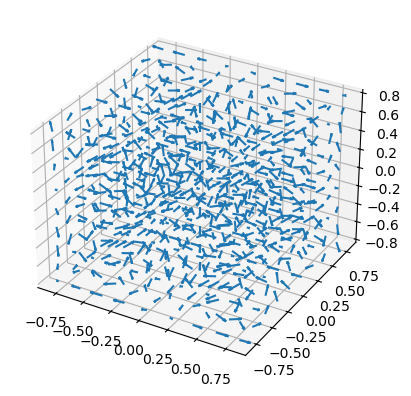

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Uncomment for interactive plots
# %matplotlib widget

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Uncomment for interactive plots
# %matplotlib widget

# Define symbolic variables
x, y, z = sp.symbols('x y z')

def derivative_3d(v:sp.Matrix) -> sp.Matrix:
    """Calculates the derivative of a 3D vector.

    Outputs a 3x3 matrix containing the derivative.
    """
    return sp.Matrix((list(v.diff(x)), list(v.diff(y)), list(v.diff(z))))


def curl(v:sp.Matrix):
    """Computes the curl of a 3D vector.

    The curl is defined as a del x v, where v is the input vector.
    """
    Dv = derivative_3d(v)
    return sp.Matrix((Dv[2,1] - Dv[1,2], Dv[0,2] - Dv[2,0], Dv[1,0] - Dv[0,1]))


vector_field = sp.Matrix([x**2,y**5,z])

sp.pprint(derivative_3d(vector_field))
# sp.pprint(sp.Matrix(derivative_3d(vector_field)))
sp.pprint(curl(vector_field))
print(curl(vector_field) == sp.zeros(3,1))

⎡2⋅x   0    0⎤
⎢            ⎥
⎢        4   ⎥
⎢ 0   5⋅y   0⎥
⎢            ⎥
⎣ 0    0    1⎦
⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦
True
